Import Libraries and read the CSV file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

sns.set()

customer_data = pd.read_csv('customer_data.csv')
customer_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the data to understand the fields.

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Look at the data types in the data frame

In [4]:
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

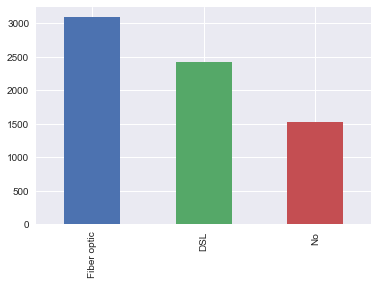

In [5]:
internet_counts = customer_data.InternetService.value_counts()
internet_counts.plot.bar()

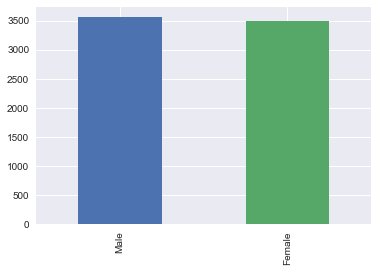

In [6]:
gender_counts = customer_data.gender.value_counts()
gender_counts.plot.bar()

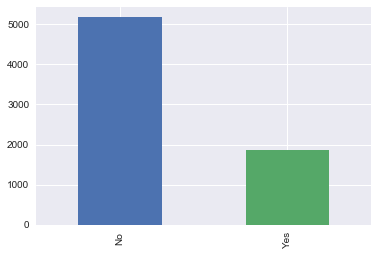

In [7]:
churn_counts = customer_data.Churn.value_counts()
churn_counts.plot.bar()

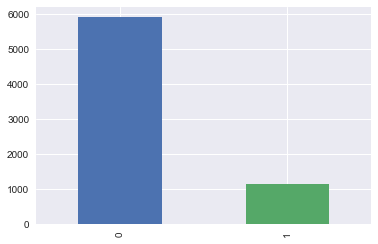

In [8]:
senior_counts = customer_data.SeniorCitizen.value_counts()
senior_counts.plot.bar()

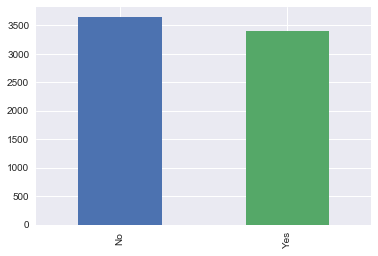

In [9]:
partner_counts = customer_data.Partner.value_counts()
partner_counts.plot.bar()

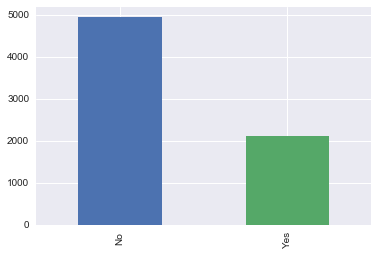

In [12]:
dependent_count = customer_data.Dependents.value_counts()
dependent_count.plot.bar()

In [13]:
customer_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

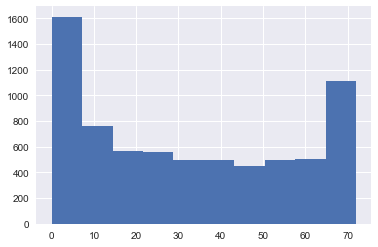

In [14]:
customer_data.tenure.hist()

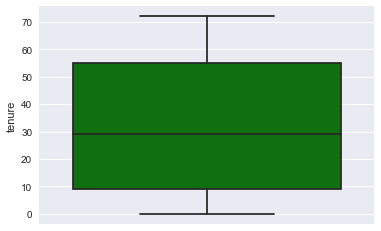

In [15]:
sns.boxplot(customer_data.tenure, color='green', orient = 'v')

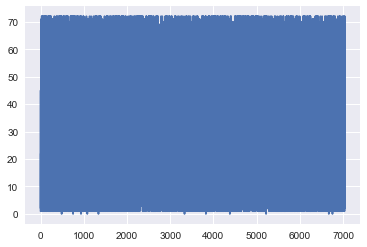

In [23]:
customer_data.tenure.sort_index().plot.line()

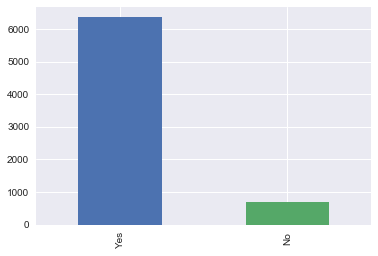

In [24]:
phone_count = customer_data.PhoneService.value_counts()
phone_count.plot.bar()

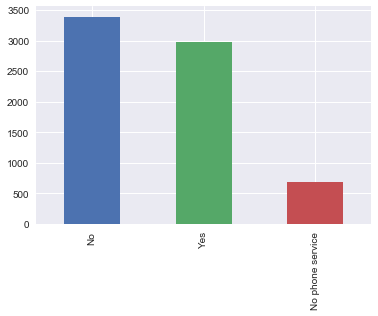

In [25]:
multi_line_count = customer_data.MultipleLines.value_counts()
multi_line_count.plot.bar()

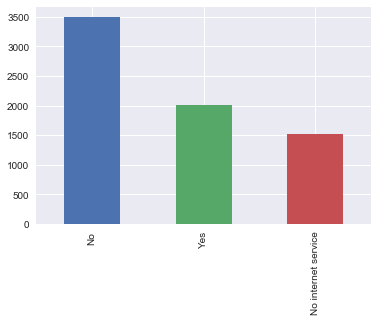

In [27]:
ols_count = customer_data.OnlineSecurity.value_counts()
ols_count.plot.bar()

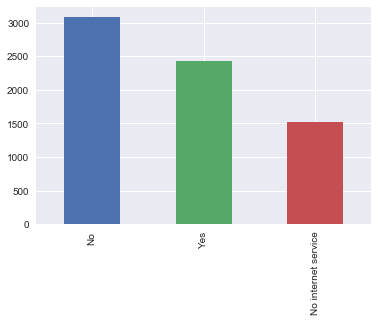

In [29]:
olb_count = customer_data.OnlineBackup.value_counts()
olb_count.plot.bar()